**Fase 1: Business/Data Understanding**

In [2]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights_dataset.csv')
flights.head()

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\3657314167.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights_dataset.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1448,404.0,4.0,430,408.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,2330,737.0,4.0,750,741.0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2296,800.0,11.0,806,811.0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,2342,748.0,8.0,805,756.0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1448,254.0,5.0,320,259.0,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape

(5729195, 27)

In [4]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
dtype: int64

In [5]:
#Om vertraging te voorspellen dienen we te weten hoeveel NaN waarden voor Departure_Delay is door 0 te vervangen
import numpy as np
flights['DEPARTURE_DELAY'].replace(0, np.nan, inplace=True)
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY         329246
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
dtype: int64

In [6]:
#Alle NaN-waarden elimineren
flights_drop = flights.dropna()
flights_drop.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [7]:
flights_drop.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,1487,527.0,40.0,542,607.0,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,1440,622.0,10.0,549,632.0,43.0,0.0,0.0,0.0,0.0
48,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,1129,509.0,11.0,500,520.0,20.0,0.0,0.0,0.0,0.0
50,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,1189,727.0,3.0,605,730.0,0.0,0.0,85.0,0.0,0.0
53,2015,1,1,4,B6,2276,N646JB,SJU,BDL,438,...,1666,902.0,6.0,739,908.0,17.0,0.0,72.0,0.0,0.0


In [8]:
#Hierdoor houden wij een beknopte dataset over
flights_drop.shape

(1046305, 27)

In [9]:
#Overige delays hebben te maken met de arrival delay
selecteren_kolommen = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_geselecteerd = flights_drop[selecteren_kolommen]
flights_geselecteerd.head(15)

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DEPARTURE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,115,127.0,542,607.0,12.0,25.0,0.0,0.0,0.0,0.0
30,125,237.0,549,632.0,72.0,43.0,0.0,0.0,0.0,0.0
48,307,304.0,500,520.0,-3.0,20.0,0.0,0.0,0.0,0.0
50,400,535.0,605,730.0,95.0,0.0,0.0,85.0,0.0,0.0
53,438,550.0,739,908.0,72.0,17.0,0.0,72.0,0.0,0.0
67,515,703.0,856,1038.0,108.0,0.0,0.0,0.0,0.0,102.0
70,520,620.0,850,950.0,60.0,0.0,0.0,60.0,0.0,0.0
71,520,618.0,841,935.0,58.0,0.0,0.0,54.0,0.0,0.0
82,530,623.0,835,941.0,53.0,13.0,0.0,53.0,0.0,0.0
87,531,550.0,857,923.0,19.0,7.0,0.0,19.0,0.0,0.0


<Axes: >

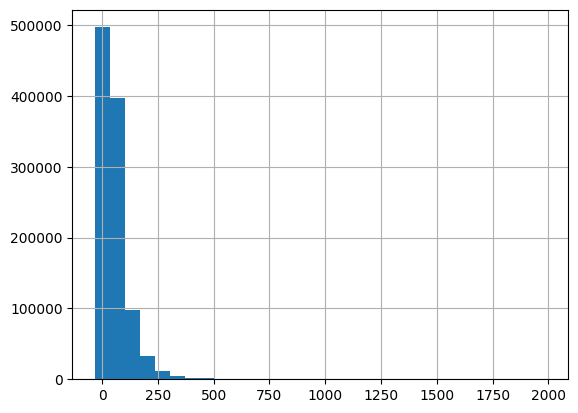

In [10]:
flights_drop.DEPARTURE_DELAY.hist(bins=30)

array([[<Axes: title={'center': 'AA'}>, <Axes: title={'center': 'AS'}>,
        <Axes: title={'center': 'B6'}>, <Axes: title={'center': 'DL'}>],
       [<Axes: title={'center': 'EV'}>, <Axes: title={'center': 'F9'}>,
        <Axes: title={'center': 'HA'}>, <Axes: title={'center': 'MQ'}>],
       [<Axes: title={'center': 'NK'}>, <Axes: title={'center': 'OO'}>,
        <Axes: title={'center': 'UA'}>, <Axes: title={'center': 'US'}>],
       [<Axes: title={'center': 'VX'}>, <Axes: title={'center': 'WN'}>,
        <Axes: >, <Axes: >]], dtype=object)

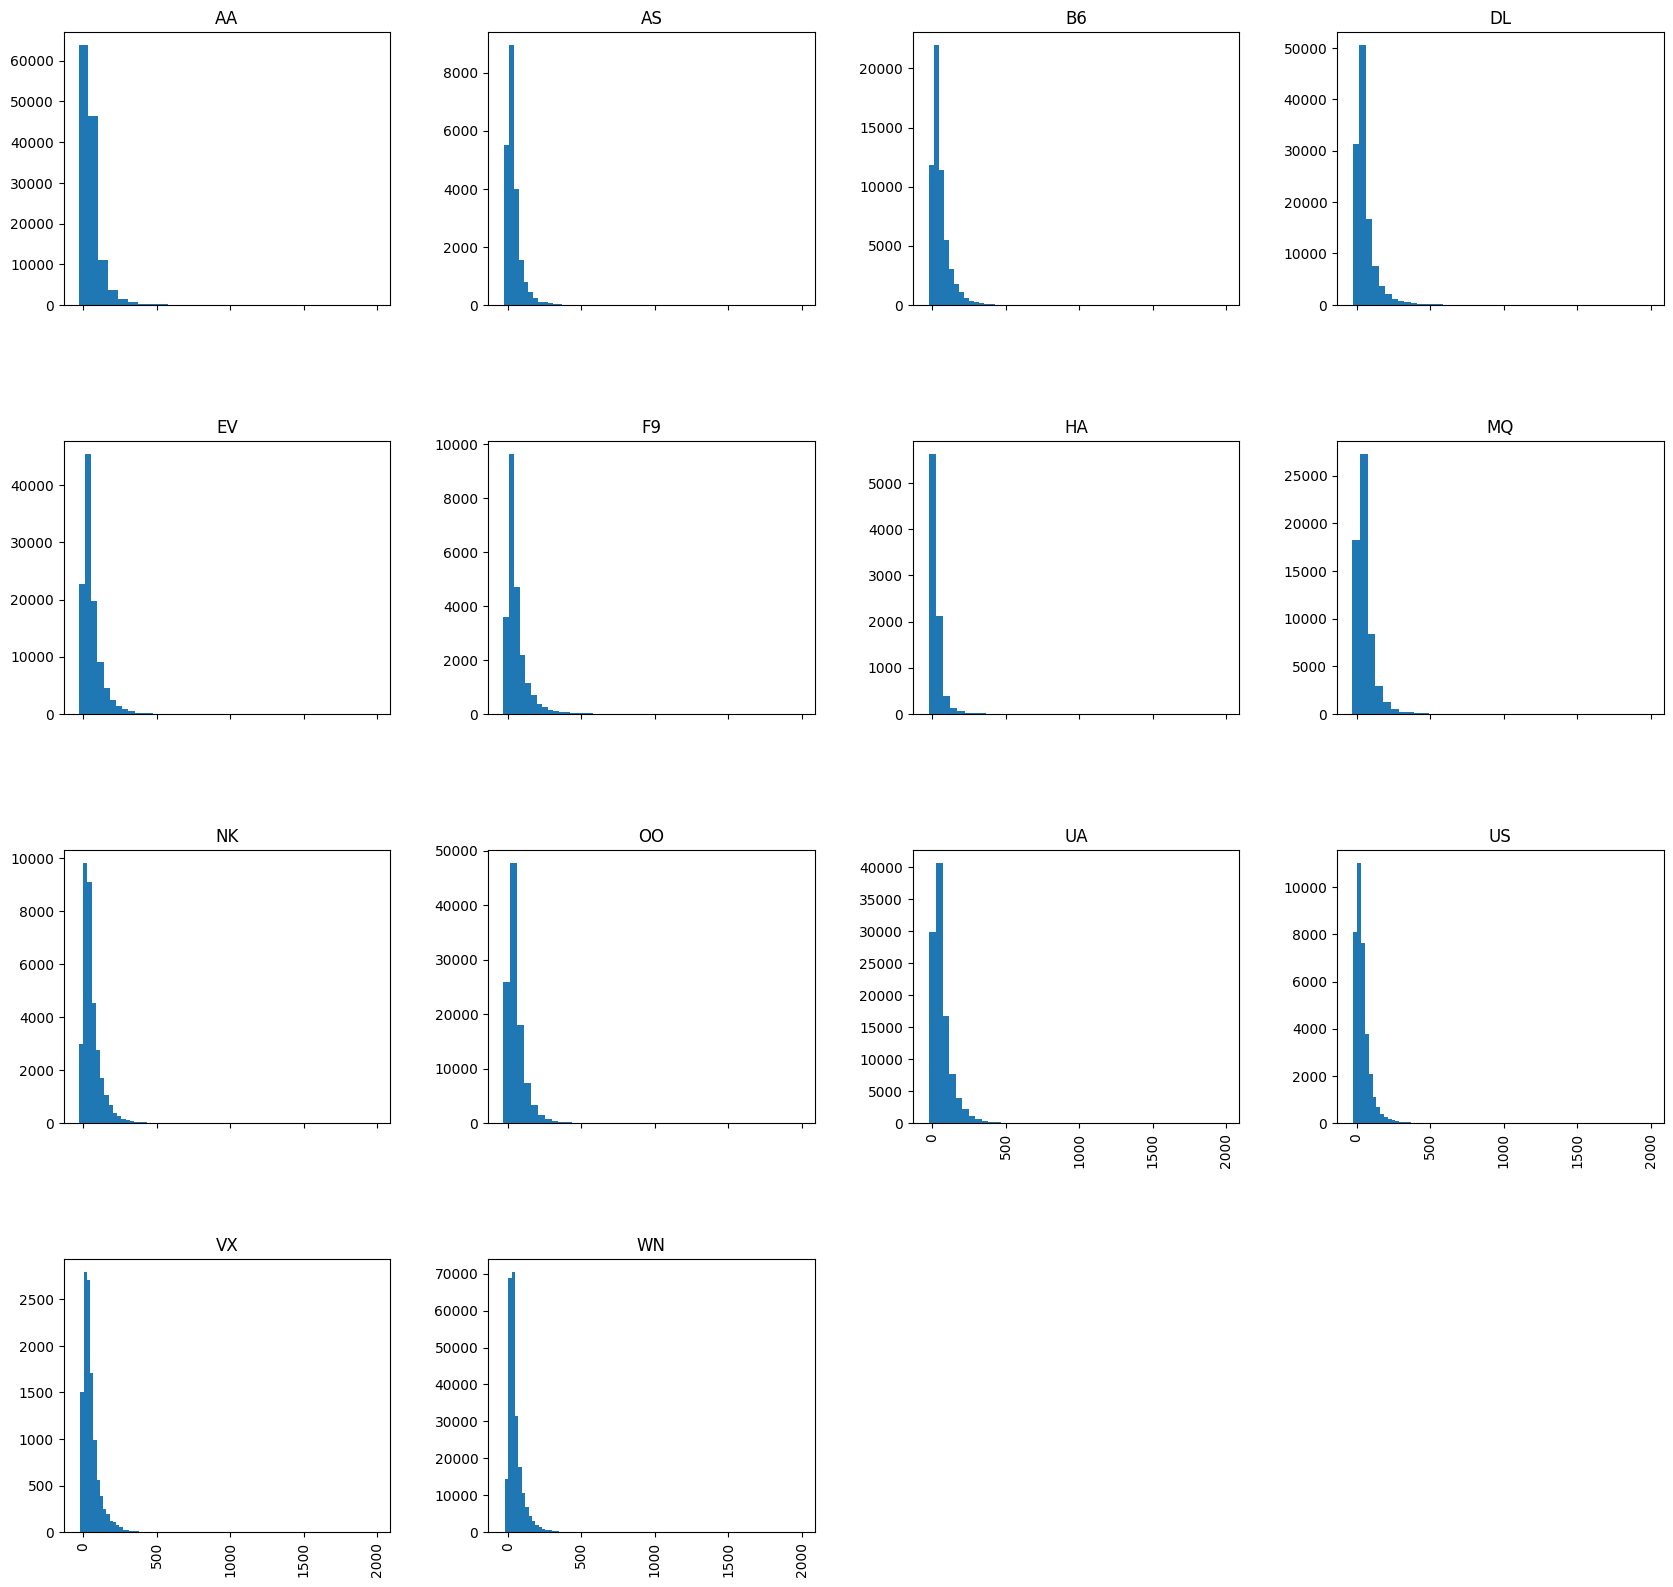

In [11]:
flights_drop.hist(column='DEPARTURE_DELAY', by='AIRLINE', bins=30, figsize=(20, 20), sharex=True)

In [12]:
import pandas as pd

# Assuming you have a DataFrame named flights_drop
flights_drop['DEPARTURE_TIME'] = flights_drop.DEPARTURE_TIME.astype('int').astype('str').str.zfill(4)

def create_departure_dt(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MONTH'])
        day = int(row['DAY'])
        hour = int(row['DEPARTURE_TIME'][:-2])
        minute = int(row['DEPARTURE_TIME'][-2:])
        dt = pd.to_datetime(f'{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}', errors='coerce')
    except:
        dt = pd.to_datetime('2000-01-01 00:00', errors='coerce')
    return dt

flights_drop['departure_dt'] = flights_drop.apply(create_departure_dt, axis=1)


C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\2189828191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['DEPARTURE_TIME'] = flights_drop.DEPARTURE_TIME.astype('int').astype('str').str.zfill(4)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\2189828191.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['departure_dt'] = flights_drop.apply(create_departure_dt, axis=1)


In [13]:
flights_drop['ARRIVAL_TIME'] = flights_drop.ARRIVAL_TIME.astype('int').astype('str').str.zfill(4)

def create_arrival_dt(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MONTH'])
        day = int(row['DAY'])
        hour = int(row['ARRIVAL_TIME'][:-2])
        minute = int(row['ARRIVAL_TIME'][-2:])
        dt = pd.to_datetime(f'{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}', errors='coerce')
    except:
        dt = pd.to_datetime('2000-01-01 00:00', errors='coerce')
    return dt

flights_drop['arrival_dt'] = flights_drop.apply(create_arrival_dt, axis=1)

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\461328842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['ARRIVAL_TIME'] = flights_drop.ARRIVAL_TIME.astype('int').astype('str').str.zfill(4)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\461328842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['arrival_dt'] = flights_drop.apply(create_arrival_dt, axis=1)


In [14]:
flights_drop['SCHEDULED_DEPARTURE'] = flights_drop.SCHEDULED_DEPARTURE.astype('int').astype('str').str.zfill(4)

def create_scheduled_departure_dt(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MONTH'])
        day = int(row['DAY'])
        hour = int(row['SCHEDULED_DEPARTURE'][:-2])
        minute = int(row['SCHEDULED_DEPARTURE'][-2:])
        dt = pd.to_datetime(f'{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}', errors='coerce')
    except:
        dt = pd.to_datetime('2000-01-01 00:00', errors='coerce')
    return dt

flights_drop['scheduled_departure_dt'] = flights_drop.apply(create_scheduled_departure_dt, axis=1)

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\980118293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['SCHEDULED_DEPARTURE'] = flights_drop.SCHEDULED_DEPARTURE.astype('int').astype('str').str.zfill(4)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_8272\980118293.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_drop['scheduled_departure_dt'] = flights_drop.apply(create_scheduled_departure_dt, axis=1)


In [15]:
flights_drop.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,departure_dt,arrival_dt,scheduled_departure_dt
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,0115,...,542,0607,25.0,0.0,0.0,0.0,0.0,2015-01-01 01:27:00,2015-01-01 06:07:00,2015-01-01 01:15:00
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,0125,...,549,0632,43.0,0.0,0.0,0.0,0.0,2015-01-01 02:37:00,2015-01-01 06:32:00,2015-01-01 01:25:00
48,2015,1,1,4,B6,1030,N239JB,BQN,MCO,0307,...,500,0520,20.0,0.0,0.0,0.0,0.0,2015-01-01 03:04:00,2015-01-01 05:20:00,2015-01-01 03:07:00
50,2015,1,1,4,B6,2134,N307JB,SJU,MCO,0400,...,605,0730,0.0,0.0,85.0,0.0,0.0,2015-01-01 05:35:00,2015-01-01 07:30:00,2015-01-01 04:00:00
53,2015,1,1,4,B6,2276,N646JB,SJU,BDL,0438,...,739,0908,17.0,0.0,72.0,0.0,0.0,2015-01-01 05:50:00,2015-01-01 09:08:00,2015-01-01 04:38:00


In [16]:
flights_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046305 entries, 27 to 5729187
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   YEAR                    1046305 non-null  int64         
 1   MONTH                   1046305 non-null  int64         
 2   DAY                     1046305 non-null  int64         
 3   DAY_OF_WEEK             1046305 non-null  int64         
 4   AIRLINE                 1046305 non-null  object        
 5   FLIGHT_NUMBER           1046305 non-null  int64         
 6   TAIL_NUMBER             1046305 non-null  object        
 7   ORIGIN_AIRPORT          1046305 non-null  object        
 8   DESTINATION_AIRPORT     1046305 non-null  object        
 9   SCHEDULED_DEPARTURE     1046305 non-null  object        
 10  DEPARTURE_TIME          1046305 non-null  object        
 11  DEPARTURE_DELAY         1046305 non-null  float64       
 12  TAXI_OUT     

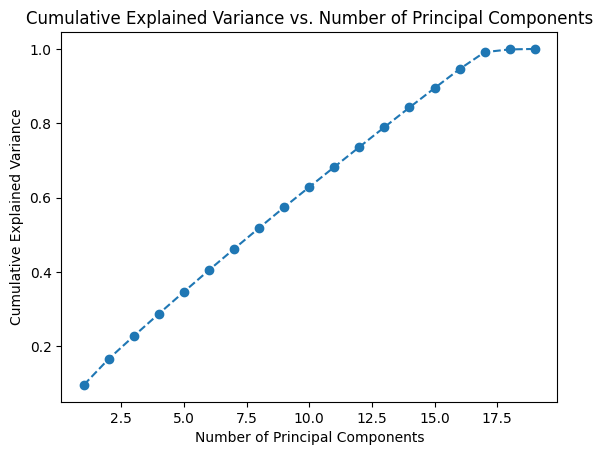

    DEPARTURE_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
27             12.0              25.0             0.0            0.0   
30             72.0              43.0             0.0            0.0   
48             -3.0              20.0             0.0            0.0   
50             95.0               0.0             0.0           85.0   
53             72.0              17.0             0.0           72.0   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  AIRLINE_AS  AIRLINE_B6  AIRLINE_DL  \
27                  0.0            0.0           0           0           0   
30                  0.0            0.0           0           0           0   
48                  0.0            0.0           0           1           0   
50                  0.0            0.0           0           1           0   
53                  0.0            0.0           0           1           0   

    AIRLINE_EV  ...  AIRLINE_NK  AIRLINE_OO  AIRLINE_UA  AIRLINE_US  \
27           0  ...        

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# One-hot encoding voor 'AIRLINE'
airline_dummies = pd.get_dummies(flights_drop['AIRLINE'], prefix='AIRLINE', drop_first=True)

# Voeg de one-hot encoded kolommen toe aan de dataset
flights_drop = pd.concat([flights_drop, airline_dummies], axis=1)

# Selecteer relevante kenmerken (bijv. vertragingen, afstand, etc.)
selected_features = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']+ list(airline_dummies.columns)

# Creëer een subset van de dataset met de geselecteerde functies
subset_data = flights_drop[selected_features].dropna()

# Standaardiseer de gegevens (belangrijk voor PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Pas PCA toe
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Visualiseer de verklarende variantie
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Kies het aantal gewenste componenten op basis van de cumulatieve verklaarde variantie
desired_components = 4  # Pas dit aan op basis van de grafiek, dus ik wil ongeveer 85% zien

# Projecteer de gegevens op de geselecteerde componenten
pca = PCA(n_components=desired_components)
pca_result_final = pca.fit_transform(scaled_data)

# Voeg de resultaten terug naar de oorspronkelijke dataset
for i in range(desired_components):
    subset_data[f'PC{i + 1}'] = pca_result_final[:, i]

# Bekijk de resultaten
print(subset_data.head())

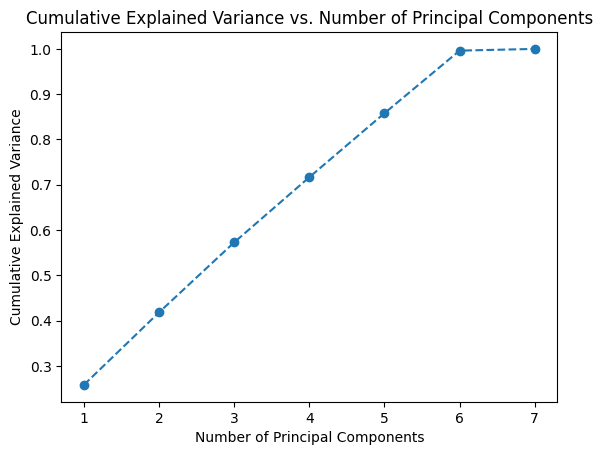

    DEPARTURE_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
27             12.0              25.0             0.0            0.0   
30             72.0              43.0             0.0            0.0   
48             -3.0              20.0             0.0            0.0   
50             95.0               0.0             0.0           85.0   
53             72.0              17.0             0.0           72.0   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  FLIGHT_NUMBER       PC1       PC2  \
27                  0.0            0.0            597 -0.978628  0.362620   
30                  0.0            0.0            168 -0.373389  0.634036   
48                  0.0            0.0           1030 -1.124846  0.267233   
50                  0.0            0.0           2134  0.858410  1.106744   
53                  0.0            0.0           2276  0.444307  1.105744   

         PC3       PC4       PC5       PC6  
27  0.339536  0.456239 -0.652742 -0.194162  
30  0.919529  

In [28]:
# Selecteer relevante kenmerken (bijv. vertragingen, afstand, etc.)
selected_features = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLIGHT_NUMBER']

# Creëer een subset van de dataset met de geselecteerde functies
subset_data = flights_drop[selected_features].dropna()

# Standaardiseer de gegevens (belangrijk voor PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Pas PCA toe
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Visualiseer de verklarende variantie
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Kies het aantal gewenste componenten op basis van de cumulatieve verklaarde variantie
desired_components = 6  # Pas dit aan op basis van de grafiek, dus ik wil ongeveer 85% zien

# Projecteer de gegevens op de geselecteerde componenten
pca = PCA(n_components=desired_components)
pca_result_final = pca.fit_transform(scaled_data)

# Voeg de resultaten terug naar de oorspronkelijke dataset
for i in range(desired_components):
    subset_data[f'PC{i + 1}'] = pca_result_final[:, i]

# Bekijk de resultaten
print(subset_data.head())

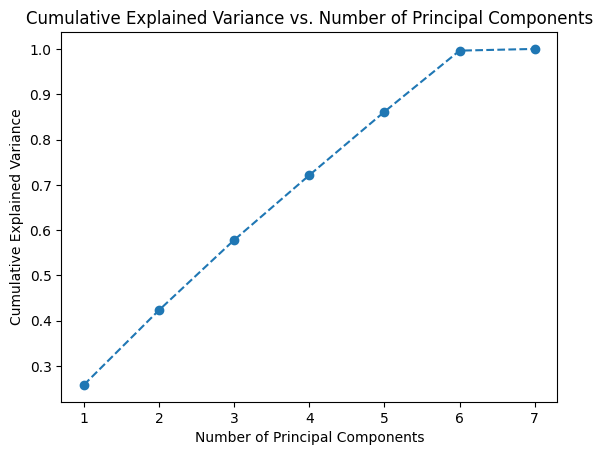

    DEPARTURE_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
27             12.0              25.0             0.0            0.0   
30             72.0              43.0             0.0            0.0   
48             -3.0              20.0             0.0            0.0   
50             95.0               0.0             0.0           85.0   
53             72.0              17.0             0.0           72.0   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  AIR_TIME       PC1       PC2  \
27                  0.0            0.0     166.0 -0.989776  0.539711   
30                  0.0            0.0     156.0 -0.375683  0.806126   
48                  0.0            0.0     160.0 -1.136980  0.415099   
50                  0.0            0.0     163.0  0.826547  1.154086   
53                  0.0            0.0     237.0  0.364205  1.674680   

         PC3       PC4       PC5       PC6  
27  0.255086  0.022522 -0.355648 -0.230600  
30  0.745879 -0.014477 -0.552203  0.298363  

In [30]:
# Selecteer relevante kenmerken (bijv. vertragingen, afstand, etc.)
selected_features = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIR_TIME']

# Creëer een subset van de dataset met de geselecteerde functies
subset_data = flights_drop[selected_features].dropna()

# Standaardiseer de gegevens (belangrijk voor PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Pas PCA toe
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Visualiseer de verklarende variantie
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Kies het aantal gewenste componenten op basis van de cumulatieve verklaarde variantie
desired_components = 6  # Pas dit aan op basis van de grafiek, dus ik wil ongeveer 85% zien

# Projecteer de gegevens op de geselecteerde componenten
pca = PCA(n_components=desired_components)
pca_result_final = pca.fit_transform(scaled_data)

# Voeg de resultaten terug naar de oorspronkelijke dataset
for i in range(desired_components):
    subset_data[f'PC{i + 1}'] = pca_result_final[:, i]

# Bekijk de resultaten
print(subset_data.head())

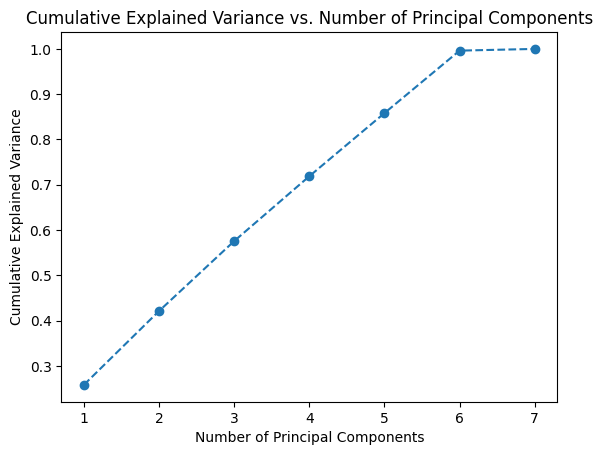

    DEPARTURE_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
27             12.0              25.0             0.0            0.0   
30             72.0              43.0             0.0            0.0   
48             -3.0              20.0             0.0            0.0   
50             95.0               0.0             0.0           85.0   
53             72.0              17.0             0.0           72.0   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DISTANCE       PC1       PC2  \
27                  0.0            0.0      1487 -0.959696  0.634024   
30                  0.0            0.0      1440 -0.348569  0.801361   
48                  0.0            0.0      1129 -1.110935  0.357981   
50                  0.0            0.0      1189  0.859034  1.290374   
53                  0.0            0.0      1666  0.442472  1.571653   

         PC3       PC4       PC5       PC6  
27  0.233053  0.203554 -0.887742 -0.210877  
30  0.808692  0.164427 -0.976238  0.292058  

In [32]:
# Selecteer relevante kenmerken (bijv. vertragingen, afstand, etc.)
selected_features = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DISTANCE']

# Creëer een subset van de dataset met de geselecteerde functies
subset_data = flights_drop[selected_features].dropna()

# Standaardiseer de gegevens (belangrijk voor PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Pas PCA toe
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Visualiseer de verklarende variantie
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Kies het aantal gewenste componenten op basis van de cumulatieve verklaarde variantie
desired_components = 6  # Pas dit aan op basis van de grafiek, dus ik wil ongeveer 85% zien

# Projecteer de gegevens op de geselecteerde componenten
pca = PCA(n_components=desired_components)
pca_result_final = pca.fit_transform(scaled_data)

# Voeg de resultaten terug naar de oorspronkelijke dataset
for i in range(desired_components):
    subset_data[f'PC{i + 1}'] = pca_result_final[:, i]

# Bekijk de resultaten
print(subset_data.head())

In [33]:
correlation_with_pcs = subset_data[['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DISTANCE', 'PC1', 'PC2']].corr()
print(correlation_with_pcs[['PC1', 'PC2']])

                              PC1           PC2
DEPARTURE_DELAY      9.770762e-01  4.009253e-02
AIR_SYSTEM_DELAY    -7.621917e-02  2.722280e-01
SECURITY_DELAY      -6.120430e-03  9.771945e-03
AIRLINE_DELAY        6.686979e-01  6.228415e-01
LATE_AIRCRAFT_DELAY  5.851967e-01 -7.154094e-01
WEATHER_DELAY        2.351899e-01 -6.688493e-02
DISTANCE            -1.173520e-03  4.019092e-01
PC1                  1.000000e+00  2.036322e-14
PC2                  2.036322e-14  1.000000e+00


In [31]:
correlation_with_pcs = subset_data[['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIR_TIME', 'PC1', 'PC2']].corr()
print(correlation_with_pcs[['PC1', 'PC2']])

                              PC1           PC2
DEPARTURE_DELAY      9.758774e-01  8.694498e-02
AIR_SYSTEM_DELAY    -8.056591e-02  4.269294e-01
SECURITY_DELAY      -6.575691e-03  2.478660e-03
AIRLINE_DELAY        6.650408e-01  5.432149e-01
LATE_AIRCRAFT_DELAY  5.891081e-01 -6.647206e-01
WEATHER_DELAY        2.348394e-01  3.895640e-02
AIR_TIME            -6.142773e-02  4.761971e-01
PC1                  1.000000e+00  4.488576e-14
PC2                  4.488576e-14  1.000000e+00


In [29]:
correlation_with_pcs = subset_data[['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLIGHT_NUMBER', 'PC1', 'PC2']].corr()
print(correlation_with_pcs[['PC1', 'PC2']])

                              PC1           PC2
DEPARTURE_DELAY      9.767719e-01  5.155447e-02
AIR_SYSTEM_DELAY    -7.659959e-02  3.290760e-01
SECURITY_DELAY      -6.405522e-03 -8.998946e-03
AIRLINE_DELAY        6.684883e-01  6.426905e-01
LATE_AIRCRAFT_DELAY  5.855933e-01 -7.610591e-01
WEATHER_DELAY        2.348731e-01 -2.273942e-02
FLIGHT_NUMBER        3.000781e-02 -1.275208e-01
PC1                  1.000000e+00  2.617997e-14
PC2                  2.617997e-14  1.000000e+00


In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# One-hot encoding voor 'AIRLINE'
origin_airport_dummies = pd.get_dummies(flights_drop['ORIGIN_AIRPORT'], prefix='ORIGIN_AIRPORT', drop_first=True)

# Voeg de one-hot encoded kolommen toe aan de oorspronkelijke dataset
flights_drop = pd.concat([flights_drop, origin_airport_dummies], axis=1)


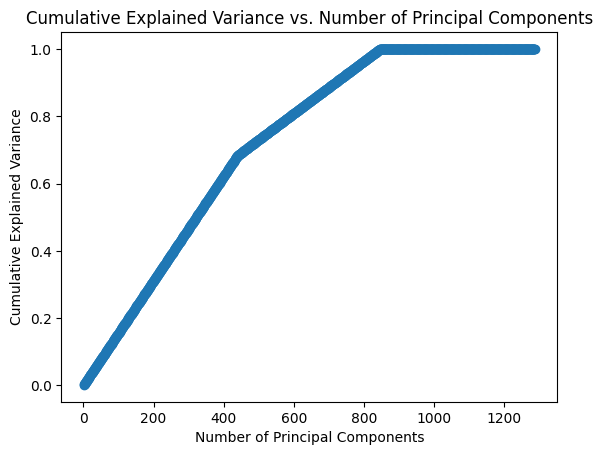

    DEPARTURE_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
27             12.0              25.0             0.0            0.0   
30             72.0              43.0             0.0            0.0   
48             -3.0              20.0             0.0            0.0   
50             95.0               0.0             0.0           85.0   
53             72.0              17.0             0.0           72.0   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  ORIGIN_AIRPORT_10136  \
27                  0.0            0.0                     0   
30                  0.0            0.0                     0   
48                  0.0            0.0                     0   
50                  0.0            0.0                     0   
53                  0.0            0.0                     0   

    ORIGIN_AIRPORT_10136  ORIGIN_AIRPORT_10140  ORIGIN_AIRPORT_10140  ...  \
27                     0                     0                     0  ...   
30                     0    

In [22]:
# Selecteer relevante kenmerken (bijv. vertragingen, afstand, etc.)
selected_features = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']+ list(origin_airport_dummies.columns)

# Creëer een subset van de dataset met de geselecteerde functies
subset_data_airport = flights_drop[selected_features].dropna()

# Standaardiseer de gegevens (belangrijk voor PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data_airport)

# Pas PCA toe
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Visualiseer de verklarende variantie
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Kies het aantal gewenste componenten op basis van de cumulatieve verklaarde variantie
desired_components = 4  # Pas dit aan op basis van de grafiek, dus ik wil ongeveer 85% zien

# Projecteer de gegevens op de geselecteerde componenten
pca = PCA(n_components=desired_components)
pca_result_final = pca.fit_transform(scaled_data)

# Voeg de resultaten terug naar de oorspronkelijke dataset
for i in range(desired_components):
    subset_data_airport[f'PC{i + 1}'] = pca_result_final[:, i]

# Bekijk de resultaten
print(subset_data_airport.head())

In [26]:
# Zorg ervoor dat de kolom 'ORIGIN_AIRPORT' van hetzelfde gegevenstype is (string)
flights_drop['ORIGIN_AIRPORT'] = flights_drop['ORIGIN_AIRPORT'].astype(str)

# Sorteer de DataFrame op basis van de kolom 'ORIGIN_AIRPORT' van laag naar hoog
airport_sorted = flights_drop.sort_values(by='ORIGIN_AIRPORT', ascending=True)

# Bekijk de resultaten
airport_sorted.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_AIRPORT_TYS,ORIGIN_AIRPORT_UST,ORIGIN_AIRPORT_VEL,ORIGIN_AIRPORT_VLD,ORIGIN_AIRPORT_VPS,ORIGIN_AIRPORT_WRG,ORIGIN_AIRPORT_WYS,ORIGIN_AIRPORT_XNA,ORIGIN_AIRPORT_YAK,ORIGIN_AIRPORT_YUM
4588014,2015,10,18,7,EV,5317,N914EV,10135,10397,1600,...,0,0,0,0,0,0,0,0,0,0
4584972,2015,10,18,7,EV,5175,N872AS,10135,11433,1255,...,0,0,0,0,0,0,0,0,0,0
4555602,2015,10,16,5,EV,5033,N843AS,10135,10397,1200,...,0,0,0,0,0,0,0,0,0,0
4549194,2015,10,16,5,EV,5144,N937EV,10135,11433,0600,...,0,0,0,0,0,0,0,0,0,0
4362681,2015,10,4,7,EV,5033,N882AS,10135,10397,1200,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Onderzoek de correlatie tussen PC1 en PC2 en de oorspronkelijke kenmerken ('DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'). Dit kan je helpen begrijpen welke oorspronkelijke kenmerken sterk bijdragen aan PC1 en PC2.
correlation_with_pcs = subset_data[['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'PC1', 'PC2']+ list(airline_dummies.columns)].corr()
print(correlation_with_pcs[['PC1', 'PC2']])

                              PC1           PC2
DEPARTURE_DELAY      9.751027e-01  6.774814e-02
AIR_SYSTEM_DELAY    -6.778707e-02  4.937530e-01
SECURITY_DELAY      -1.283720e-02  9.598075e-02
AIRLINE_DELAY        6.616663e-01  1.455196e-01
LATE_AIRCRAFT_DELAY  5.861226e-01 -2.894292e-01
WEATHER_DELAY        2.319891e-01  5.719481e-02
PC1                  1.000000e+00 -3.015770e-15
PC2                 -3.015770e-15  1.000000e+00
AIRLINE_AS          -5.860048e-02  1.124872e-01
AIRLINE_B6          -2.313755e-03  1.666956e-01
AIRLINE_DL           3.204048e-02  1.221954e-01
AIRLINE_EV           2.504832e-02  1.370034e-01
AIRLINE_F9           2.041848e-02  1.475181e-01
AIRLINE_HA          -4.907494e-02 -9.666663e-02
AIRLINE_MQ           2.767695e-03  2.098813e-01
AIRLINE_NK          -1.659638e-02  1.893590e-01
AIRLINE_OO           1.374008e-02  5.639551e-02
AIRLINE_UA           8.033640e-02  1.639863e-01
AIRLINE_US          -9.553526e-02  2.129161e-01
AIRLINE_VX          -1.732435e-02  2.985

In [20]:
# Bekijk de absolute correlatiewaarden tussen PC1, PC2 en andere kolommen
correlation_abs = correlation_with_pcs[['PC1', 'PC2']].abs()

# Selecteer de kolommen met sterke correlaties (bijv. boven een bepaalde drempel, zoals 0.5)
strong_correlations = correlation_abs[(correlation_abs['PC1'] > 0.5) | (correlation_abs['PC2'] > 0.5)]

# Toon de kolommen met sterke correlaties
print(strong_correlations)

                              PC1           PC2
DEPARTURE_DELAY      9.751027e-01  6.774814e-02
AIRLINE_DELAY        6.616663e-01  1.455196e-01
LATE_AIRCRAFT_DELAY  5.861226e-01  2.894292e-01
PC1                  1.000000e+00  3.015770e-15
PC2                  3.015770e-15  1.000000e+00
AIRLINE_WN           3.612270e-02  8.325343e-01


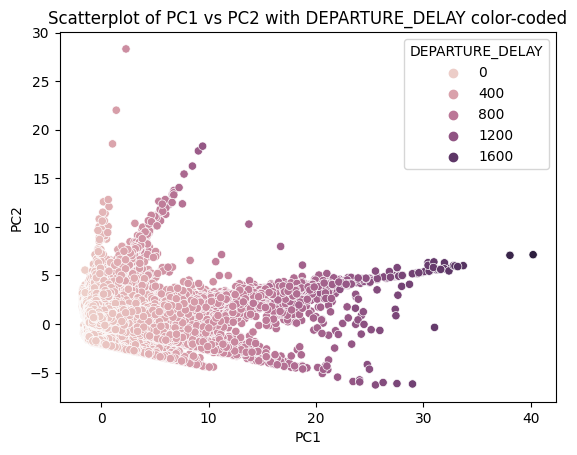

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='DEPARTURE_DELAY', data=subset_data)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PC1 vs PC2 with DEPARTURE_DELAY color-coded')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

y = flights_drop['AIRLINE_DELAY']
X = flights_drop[['SECURITY_DELAY']]

X_train, X_test, y_train, y_test = train_test_split(
                                                X, y, test_size=0.20, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [46]:
from sklearn.metrics import accuracy_score
# predict the scores based on the test data
y_pred = clf.predict(X_test)

#compute the accuracy score by comparing the y_test results with the predicted results.
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.45640611485178795

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
predictors = ['SECURITY_DELAY']

# Kies de doelvariabele
doelvariabele = 'AIRLINE_DELAY'

# Split de dataset in training en test sets
X_train, X_test, y_train, y_test = train_test_split(flights_drop[predictors], flights_drop[doelvariabele], test_size=0.2, random_state=42)

# Initialiseer het RandomForestRegressor model
model = RandomForestRegressor()

# Train het model op de trainingset
model.fit(X_train, y_train)

# Voorspel de doelvariabele op de testset
voorspellingen = model.predict(X_test)

# Evalueren van het model
mse = mean_squared_error(y_test, voorspellingen)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2290.7117058597805
